In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')  
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape       # (rows, columns)



(891, 15)

In [4]:

df.columns     # Column names



Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:

df.dtypes      # Datatypes of each column


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [6]:

df.info()      # Full column summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe(include='all')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


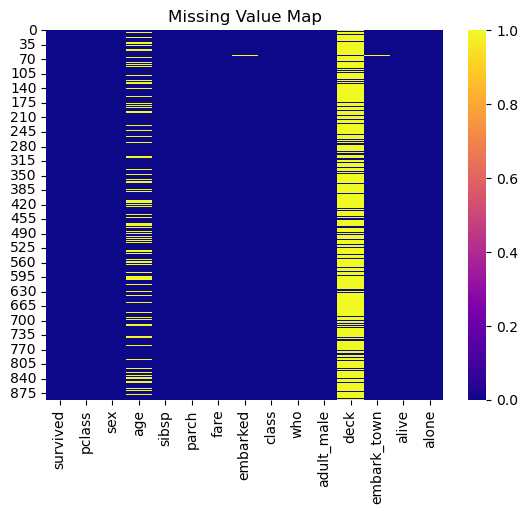

In [8]:
df.isnull().sum()
df.isnull().mean() * 100  # Percentage of missing values

# Visualize
sns.heatmap(df.isnull(), cmap='plasma')
plt.title("Missing Value Map")
plt.show()


In [9]:
df.duplicated().sum()


107

In [10]:
df.nunique()


survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
df['survived'].value_counts()
df['class'].value_counts(normalize=True)  # Percentage


class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64

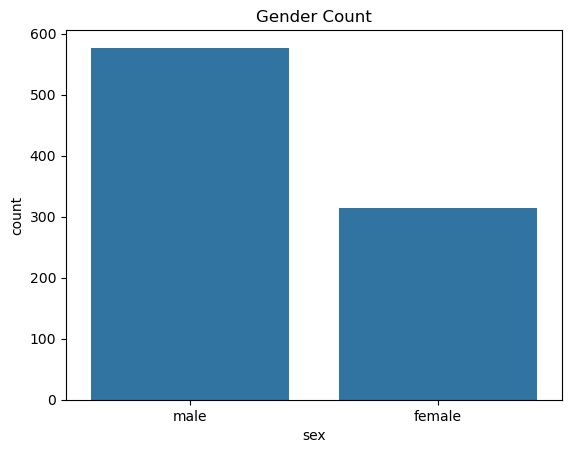

In [12]:
sns.countplot(x='sex', data=df)
plt.title("Gender Count")
plt.show()


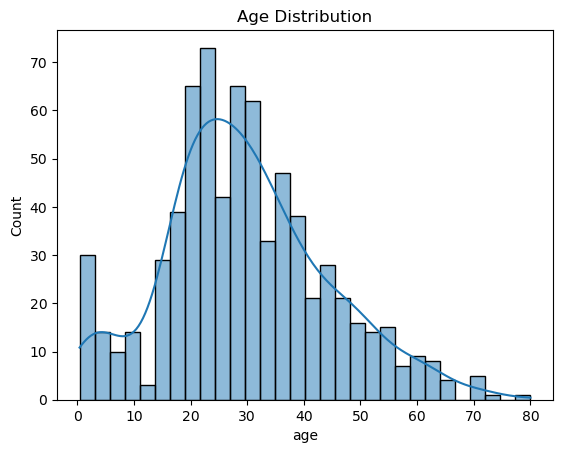

In [13]:
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


<Axes: xlabel='sex', ylabel='count'>

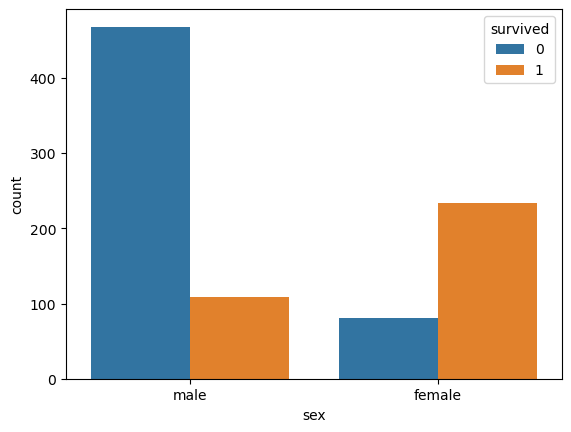

In [14]:
sns.countplot(x='sex', hue='survived', data=df)


<Axes: xlabel='class', ylabel='fare'>

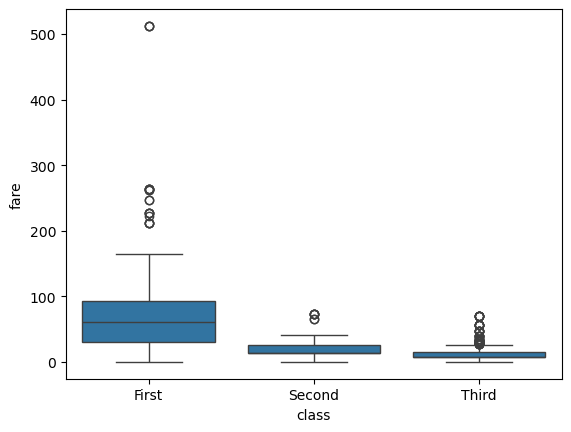

In [15]:
sns.boxplot(x='class', y='fare', data=df)


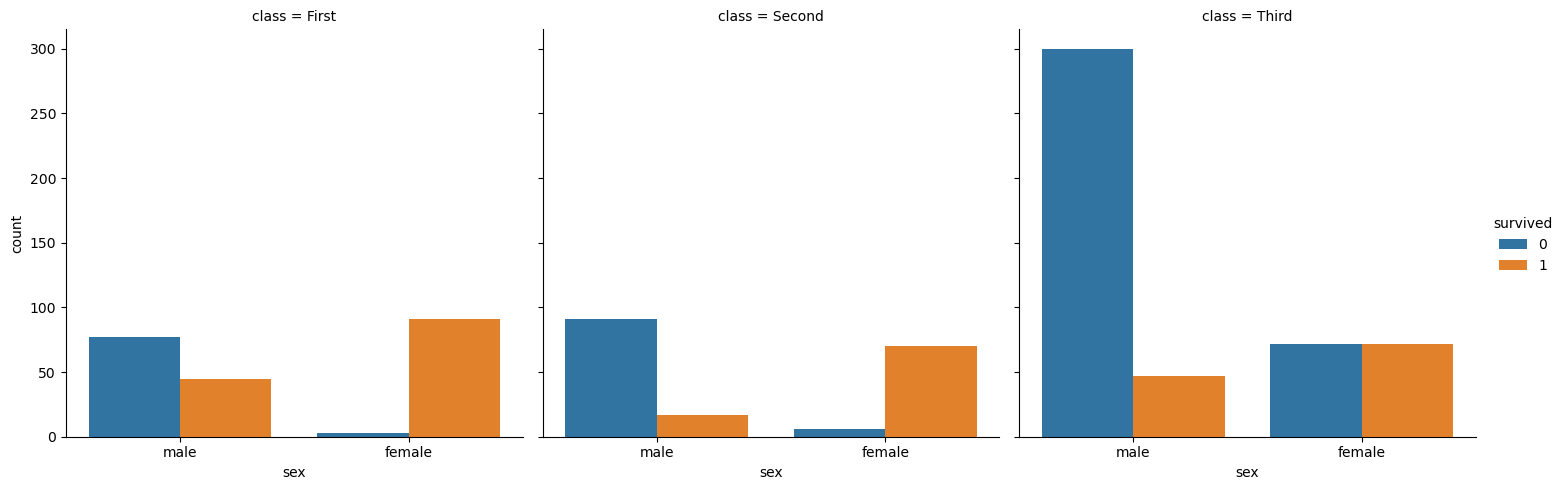

In [16]:
sns.catplot(x='sex', hue='survived', col='class', data=df, kind='count')


In [20]:
pd.crosstab(df['sex'], df['survived'], normalize='index')

df.pivot_table(index='sex', columns='pclass', values='age', aggfunc='mean')


pclass,1,2,3
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


<Axes: xlabel='class', ylabel='age'>

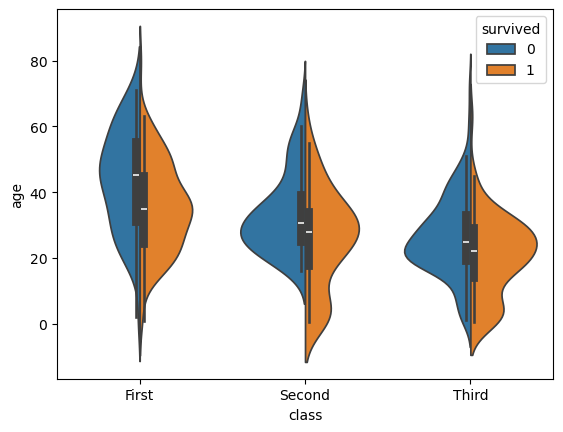

In [21]:
sns.violinplot(x='class', y='age', hue='survived', data=df, split=True)


<Axes: xlabel='class', ylabel='age'>

c:\Users\venka\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


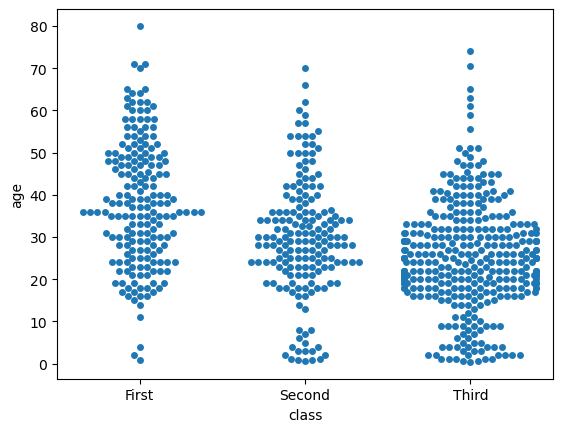

In [22]:
sns.swarmplot(x='class', y='age', data=df)


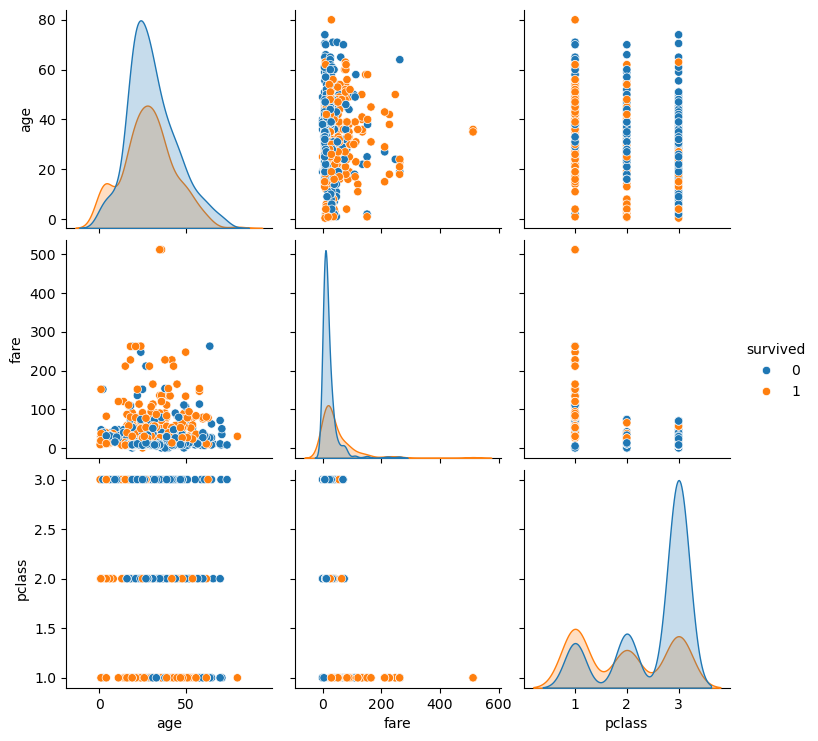

In [23]:
sns.pairplot(df[['survived', 'age', 'fare', 'pclass']], hue='survived')


In [24]:
df.skew(numeric_only=True)
df.kurt(numeric_only=True)


survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64